In [ ]:
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('default')
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import scipy
from numpy.linalg import inv
import math

### Data Import from Quandl

In [2]:
token = ""# to run enter your token
n = range(1,21)
nms = ["CHRIS/CME_ED"+str(i) for i in n]
dfs = [quandl.get(nm, authtoken=token) for nm in nms]

### Indentification of 8 most liquid contracts:
I used average of daily traded volume to find most liquid contracts

In [3]:
means = list()
for i in range(0,20):
    sam = dfs[i].ix['2004-01-01':'2006-12-31']
    mean = sam['Volume'].mean()
    means.append(mean)
    
    
def list_ele_idx(li):
    return [(y,x) for x,y in enumerate(li)]
a = list_ele_idx(means)
a.sort(reverse=True)

print('Contracts,in most to least liquid order:(Avg. Vol, ED#) \n\n',a)

Contracts,in most to least liquid order:(Avg. Vol, ED#) 

 [(117349.75984251969, 4), (117017.1469816273, 3), (96988.03937007874, 2), (84784.7779237845, 5), (74288.84645669292, 1), (57316.56824146982, 6), (44318.78272251309, 0), (39650.56767411301, 7), (16415.28401585205, 8), (10718.446949602123, 9), (7239.628985507246, 10), (4420.742811501597, 11), (1091.2017391304348, 12), (681.3339130434782, 13), (529.0660869565218, 14), (466.6382608695652, 15), (317.60104529616723, 16), (262.7600700525394, 17), (231.27351916376307, 18), (220.99298245614034, 19)]


C:\Users\manaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
columns = list()
for i in range(0,8):
    name = ('ED'+str(a[i][1]+1))
    columns.append(name)
columns # list of colums to extract most liquid contracts

['ED5', 'ED4', 'ED3', 'ED6', 'ED2', 'ED7', 'ED1', 'ED8']

### Creating Dataframe with Most Liquid Contracts:

In [5]:
sample = pd.concat([dfs[a[0][1]]['Settle'],dfs[a[1][1]]['Settle'], dfs[a[2][1]]['Settle'],dfs[a[3][1]]['Settle'], dfs[a[4][1]]['Settle'], dfs[a[5][1]]['Settle'], dfs[a[6][1]]['Settle'], dfs[a[7][1]]['Settle']],axis = 1)
df = sample.loc['2004-01-01':'2006-12-31']
df.columns = columns
sample1 = df.dropna()

df1 = sample.loc['2007-01-01':'2007-03-31']
df1.columns = columns
outofsample = df1


### Functions to check sanity of Data

In [6]:
def find_na_dates(df):
    # finds nan's in data
    columns = list(df)
    for i in range(len(columns)):
        print(columns[i])
        ind = df[columns[i]].index[df[columns[i]].apply(np.isnan)]
        print(ind)
def sanity_check(df1,max_allowed_change):
    #takes dataframe as input and returns dates with change greater than specified % between 2 consecutive days  
    df = df1.diff(periods=1).dropna()
    df1.to_excel('output.xlsx')
    df[df > max_allowed_change] = np.nan
    return find_na_dates(df)

### Converting Price Data to Rate Data

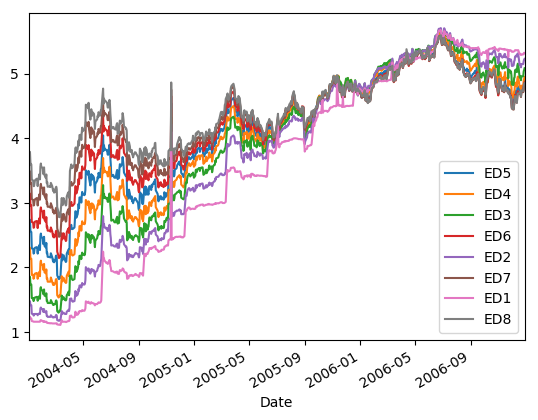

ED5
DatetimeIndex(['2004-11-11'], dtype='datetime64[ns]', name='Date', freq=None)
ED4
DatetimeIndex(['2004-06-14', '2004-11-11'], dtype='datetime64[ns]', name='Date', freq=None)
ED3
DatetimeIndex(['2004-06-14', '2004-11-11'], dtype='datetime64[ns]', name='Date', freq=None)
ED6
DatetimeIndex(['2004-11-11'], dtype='datetime64[ns]', name='Date', freq=None)
ED2
DatetimeIndex(['2004-06-14', '2004-11-11'], dtype='datetime64[ns]', name='Date', freq=None)
ED7
DatetimeIndex(['2004-11-11'], dtype='datetime64[ns]', name='Date', freq=None)
ED1
DatetimeIndex(['2004-06-14', '2004-11-11'], dtype='datetime64[ns]', name='Date', freq=None)
ED8
DatetimeIndex(['2004-11-11'], dtype='datetime64[ns]', name='Date', freq=None)


In [7]:
rates = 100 - sample1
rates.plot()
plt.show()
sanity_check(rates,0.5)

### Sanity Check:

On dates 2004-06-14 & 2004-11-11 eurodollar rates spiked, while it may feel like some error in the data. But those two dates were marked by the Fed Policy changes where Fed hiked interest rates by 25 basis points on June 30th 2004 and Nov 10th 2004,
So, I am not adjusting for abnormal changes in the data. Following article provides the refernce about impending changes anticipated by markets and resaoning for out-of-whack realtionship between FFR and EuroDollar Futures.
https://www.realclearmarkets.com/articles/2013/11/22/the_fomc_begins_to_lose_control_of_the_curve_100751.html

### Out of Sample Test Data:

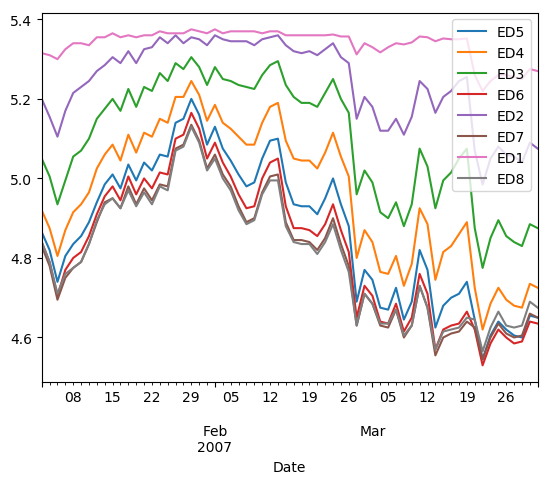

ED5
DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)
ED4
DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)
ED3
DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)
ED6
DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)
ED2
DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)
ED7
DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)
ED1
DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)
ED8
DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)


In [8]:
rates_out = 100 - outofsample
rates_out.plot()
plt.show()
sanity_check(rates_out,0.5)

### Problem 3: (1)

In [9]:
com = list(itertools.permutations(columns,2))
print('All possible combinations ', len(com), ' combinations of cointegrated are:\n',com)
type(com)

All possible combinations  56  combinations of cointegrated are:
 [('ED5', 'ED4'), ('ED5', 'ED3'), ('ED5', 'ED6'), ('ED5', 'ED2'), ('ED5', 'ED7'), ('ED5', 'ED1'), ('ED5', 'ED8'), ('ED4', 'ED5'), ('ED4', 'ED3'), ('ED4', 'ED6'), ('ED4', 'ED2'), ('ED4', 'ED7'), ('ED4', 'ED1'), ('ED4', 'ED8'), ('ED3', 'ED5'), ('ED3', 'ED4'), ('ED3', 'ED6'), ('ED3', 'ED2'), ('ED3', 'ED7'), ('ED3', 'ED1'), ('ED3', 'ED8'), ('ED6', 'ED5'), ('ED6', 'ED4'), ('ED6', 'ED3'), ('ED6', 'ED2'), ('ED6', 'ED7'), ('ED6', 'ED1'), ('ED6', 'ED8'), ('ED2', 'ED5'), ('ED2', 'ED4'), ('ED2', 'ED3'), ('ED2', 'ED6'), ('ED2', 'ED7'), ('ED2', 'ED1'), ('ED2', 'ED8'), ('ED7', 'ED5'), ('ED7', 'ED4'), ('ED7', 'ED3'), ('ED7', 'ED6'), ('ED7', 'ED2'), ('ED7', 'ED1'), ('ED7', 'ED8'), ('ED1', 'ED5'), ('ED1', 'ED4'), ('ED1', 'ED3'), ('ED1', 'ED6'), ('ED1', 'ED2'), ('ED1', 'ED7'), ('ED1', 'ED8'), ('ED8', 'ED5'), ('ED8', 'ED4'), ('ED8', 'ED3'), ('ED8', 'ED6'), ('ED8', 'ED2'), ('ED8', 'ED7'), ('ED8', 'ED1')]


list

#### CCA with Chou Ng Method

In [10]:
def CCA_Chou_Ng(data_set):
    
    #data_set is pandas dataframe
    df_lag = data_set.shift(1).dropna()
    df = data_set.drop(data_set.index[0]).dropna()
    n = len(data_set.columns)
    
    #X(t) ~ M_1 + X(t-1)
    X = df_lag.as_matrix()
    X_I = sm.add_constant(X)
    Y = df.as_matrix()
    l1 = sm.OLS(Y,X_I).fit()
    B=l1.params[1:(n+1)]
    
    #X(t-1) ~ M_2 + X(t)
    Y_I = sm.add_constant(Y)
    l2 = sm.OLS(X,Y_I).fit()
    A=l2.params[1:(n+1)]
    C = np.dot(A,B)
    eig_val, eig_vec = np.linalg.eig(C)
    ascor = np.argsort(eig_val)
    eig_val, eig_vec = eig_val[ascor], eig_vec[:, ascor]
    return eig_val, eig_vec, C

#### Weights for 56 combinations:

In [11]:
weights_ng= []
for i in range(0,56):
    ls = [com[i][0], com[i][1]]
    fly=rates[ls]
    df1 = fly
    n = len(df1.columns)
    val, vec, C = CCA_Chou_Ng(df1)
    vec = pd.DataFrame(vec)
    vec = vec.rename(columns=lambda x: n-x-1, inplace=False)
    #print (vec)
    w = vec[1].values
    w_cca_cn = np.round([1, w[1]/w[0]],decimals=4)
    weights_ng.append(w_cca_cn) 

In [12]:
weights = pd.DataFrame({'Combination': com,'Wt_NgCCA': weights_ng})
weights.set_index('Combination', inplace = True)
add = weights.index.values
weights.head(8)

,Wt_NgCCA
Combination,
"(ED5, ED4)","[1.0, -0.8344]"
"(ED5, ED3)","[1.0, -0.7107]"
"(ED5, ED6)","[1.0, -1.2056]"
"(ED5, ED2)","[1.0, -0.6242]"
"(ED5, ED7)","[1.0, -1.4689]"
"(ED5, ED1)","[1.0, -0.5771]"
"(ED5, ED8)","[1.0, -1.7721]"
"(ED4, ED5)","[1.0, -1.1984]"


### Problem 3: (2): In Sample Analysis:

In [13]:
# Function to evaluate stationarity of return series

def adf_test(df):
    adf = adfuller(df)
    y = 'Time Series is stationary'
    n = 'Time series is not stationary'
    if adf[0]<=adf[4]['5%']:
        return [adf[0],adf[4]['5%'],adf[1],y]
    else:
        return [adf[0],adf[4]['5%'],adf[1],n]

In [14]:
WSPR_Ng=[]
for i in range(0,56):
    ret = rates[add[i][0]]*weights['Wt_NgCCA'] [i][0]+ rates[add[i][1]]*weights['Wt_NgCCA'] [i][1]
    WSPR_Ng.append(ret)
price = []
for i in range(0,56):
    pr = sample1[add[i][0]]*weights['Wt_NgCCA'] [i][0]+ sample1[add[i][1]]*weights['Wt_NgCCA'] [i][1]
    price.append(pr)

In [15]:
WSPR_NgCCA = pd.DataFrame(WSPR_Ng).T
WSPR_NgCCA.columns = com


price_cca = pd.DataFrame(price).T
price_cca.columns = com

WSPR_NgCCA.head(2),price_cca.head(2)

(            (ED5, ED4)  (ED5, ED3)  (ED5, ED6)  (ED5, ED2)  (ED5, ED7)  \
 Date                                                                     
 2004-01-02    0.804192    1.407437   -1.051612    1.806821   -2.379117   
 2004-01-05    0.816708    1.421651   -1.051612    1.819305   -2.386461   
 
             (ED5, ED1)  (ED5, ED8)  (ED4, ED5)  (ED4, ED3)  (ED4, ED6)  \
 Date                                                                     
 2004-01-02    2.024396   -3.976259   -0.963616    0.721937   -2.235218   
 2004-01-05    2.027281   -3.976259   -0.978616    0.723984   -2.250218   
 
                ...      (ED1, ED2)  (ED1, ED7)  (ED1, ED8)  (ED8, ED5)  \
 Date           ...                                                       
 2004-01-02     ...       -0.369368   -7.679161  -10.421072    2.243818   
 2004-01-05     ...       -0.352837   -7.696957  -10.426072    2.243818   
 
             (ED8, ED4)  (ED8, ED3)  (ED8, ED6)  (ED8, ED2)  (ED8, ED7)  \
 Date              

In [16]:
adf_stat_NgCCA = []
for i in range(0,56):
    t = adf_test(WSPR_NgCCA[com[i]])
    adf_stat_NgCCA.append(t)

In [17]:
header = ['ADF Statistics', 't at 95% CD','p-value','Result']
Stationary_NgCCA = pd.DataFrame(adf_stat_NgCCA)
Stationary_NgCCA.columns = header
Stationary_NgCCA['Combination'] =com
Stationary_NgCCA.set_index('Combination', inplace=True)
Stationary_NgCCA.head(8)

,ADF Statistics,t at 95% CD,p-value,Result
Combination,,,,
"(ED5, ED4)",-2.916222,-2.865366,0.043494,Time Series is stationary
"(ED5, ED3)",-2.850693,-2.865366,0.051390,Time series is not stationary
"(ED5, ED6)",-2.761680,-2.865366,0.063959,Time series is not stationary
"(ED5, ED2)",-2.705053,-2.865366,0.073168,Time series is not stationary
"(ED5, ED7)",-2.528231,-2.865366,0.108756,Time series is not stationary
"(ED5, ED1)",-2.633980,-2.865366,0.086176,Time series is not stationary
"(ED5, ED8)",-2.472741,-2.865366,0.122248,Time series is not stationary
"(ED4, ED5)",-2.916286,-2.865366,0.043487,Time Series is stationary


### Top 5 In-Sample Staionary Combinations:

In [18]:
Top_5 = Stationary_NgCCA.sort_values('p-value', ascending=True)
Top_5.head(5)

,ADF Statistics,t at 95% CD,p-value,Result
Combination,,,,
"(ED4, ED5)",-2.916286,-2.865366,0.043487,Time Series is stationary
"(ED5, ED4)",-2.916222,-2.865366,0.043494,Time Series is stationary
"(ED3, ED5)",-2.850700,-2.865366,0.051389,Time series is not stationary
"(ED5, ED3)",-2.850693,-2.865366,0.051390,Time series is not stationary
"(ED3, ED6)",-2.838736,-2.865366,0.052950,Time series is not stationary


### Problem 3: (3): Out of Sample Analysis:

In [19]:
WSPR_Ng_out=[]
for i in range(0,56):
    ret_out = rates_out[add[i][0]]*weights['Wt_NgCCA'] [i][0]+ rates_out[add[i][1]]*weights['Wt_NgCCA'] [i][1]
    WSPR_Ng_out.append(ret_out)
price_out = []
for i in range(0,56):
    p_out = outofsample[add[i][0]]*weights['Wt_NgCCA'] [i][0]+ outofsample[add[i][1]]*weights['Wt_NgCCA'] [i][1]
    price_out.append(p_out)


In [20]:
WSPR_NgCCA_out = pd.DataFrame(WSPR_Ng_out).T
WSPR_NgCCA_out.columns = com
WSPR_NgCCA_out.head(2)

price_NgCCA_out = pd.DataFrame(price_out).T
price_NgCCA_out.columns = com
WSPR_NgCCA_out.head(2), price_NgCCA_out.head(2)

(            (ED5, ED4)  (ED5, ED3)  (ED5, ED6)  (ED5, ED2)  (ED5, ED7)  \
 Date                                                                     
 2007-01-02    0.759752    1.275965   -0.970104    1.619160   -2.229787   
 2007-01-03    0.752300    1.262946   -0.954824    1.602249   -2.201342   
 
             (ED5, ED1)  (ED5, ED8)  (ED4, ED5)  (ED4, ED3)  (ED4, ED6)  \
 Date                                                                     
 2007-01-02    1.797713   -3.711964   -0.910216    0.615885   -2.090256   
 2007-01-03    1.755599   -3.668359   -0.901288    0.609239   -2.062836   
 
                ...      (ED1, ED2)  (ED1, ED7)  (ED1, ED8)  (ED8, ED5)  \
 Date           ...                                                       
 2007-01-02     ...       -0.282800   -7.046419   -9.576712    2.094681   
 2007-01-03     ...       -0.239357   -6.923454   -9.427872    2.070074   
 
             (ED8, ED4)  (ED8, ED3)  (ED8, ED6)  (ED8, ED2)  (ED8, ED7)  \
 Date              

In [21]:
adf_stat_NgCCA_out = []
for i in range(0,56):
    t_out = adf_test(WSPR_NgCCA_out[com[i]])
    adf_stat_NgCCA_out.append(t_out)

In [22]:
header = ['ADF Statistics', 't at 95% CD','p-value','Result']
Stationary_NgCCA_out = pd.DataFrame(adf_stat_NgCCA_out)
Stationary_NgCCA_out.columns = header
Stationary_NgCCA_out['Combination'] =com
Stationary_NgCCA_out.set_index('Combination', inplace=True)
Stationary_NgCCA_out.head(8)

,ADF Statistics,t at 95% CD,p-value,Result
Combination,,,,
"(ED5, ED4)",-1.369123,-2.908645,0.596986,Time series is not stationary
"(ED5, ED3)",-1.189153,-2.908645,0.678244,Time series is not stationary
"(ED5, ED6)",-1.377596,-2.908645,0.592969,Time series is not stationary
"(ED5, ED2)",-1.102411,-2.908645,0.714109,Time series is not stationary
"(ED5, ED7)",-1.411532,-2.908645,0.576735,Time series is not stationary
"(ED5, ED1)",-1.056821,-2.908645,0.731980,Time series is not stationary
"(ED5, ED8)",-1.433956,-2.908645,0.565893,Time series is not stationary
"(ED4, ED5)",-1.369282,-2.908645,0.596911,Time series is not stationary


### Out of Sample Top 5 Combinations:

In [23]:
Out_Top_5 = Stationary_NgCCA_out.sort_values('p-value', ascending=True)
Out_Top_5.head(10)

,ADF Statistics,t at 95% CD,p-value,Result
Combination,,,,
"(ED8, ED7)",-1.689007,-2.908645,0.436785,Time series is not stationary
"(ED7, ED8)",-1.688920,-2.908645,0.436830,Time series is not stationary
"(ED7, ED6)",-1.575805,-2.908645,0.495735,Time series is not stationary
"(ED6, ED7)",-1.575687,-2.908645,0.495794,Time series is not stationary
"(ED8, ED6)",-1.546249,-2.908645,0.510521,Time series is not stationary
"(ED6, ED8)",-1.546189,-2.908645,0.510551,Time series is not stationary
"(ED5, ED8)",-1.433956,-2.908645,0.565893,Time series is not stationary
"(ED8, ED5)",-1.433954,-2.908645,0.565894,Time series is not stationary
"(ED7, ED5)",-1.411563,-2.908645,0.576720,Time series is not stationary


### Out of Sample Analysis of Top 5 In-Sample Combinations:

In [24]:
Top5_com = Top_5.index.values[:10]
Top5_com

array([('ED4', 'ED5'), ('ED5', 'ED4'), ('ED3', 'ED5'), ('ED5', 'ED3'),
       ('ED3', 'ED6'), ('ED6', 'ED3'), ('ED4', 'ED6'), ('ED6', 'ED4'),
       ('ED6', 'ED5'), ('ED5', 'ED6')], dtype=object)

In [25]:
WSPR_Ng_Top5out=[]
for i in range(0,10):
    ret_Top5out = rates_out[Top5_com[i][0]]*weights.ix[[Top5_com[i]]]['Wt_NgCCA'][0][0]+ rates_out[Top5_com[i][1]]*weights.ix[[Top5_com[i]]]['Wt_NgCCA'][0][1]
    WSPR_Ng_Top5out.append(ret_Top5out)

C:\Users\manaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
WSPR_NgCCA_Top5out = pd.DataFrame(WSPR_Ng_Top5out).T
WSPR_NgCCA_Top5out.columns = Top5_com
WSPR_NgCCA_Top5out.head()

,"(ED4, ED5)","(ED5, ED4)","(ED3, ED5)","(ED5, ED3)","(ED3, ED6)","(ED6, ED3)","(ED4, ED6)","(ED6, ED4)","(ED6, ED5)","(ED5, ED6)"
Date,,,,,,,,,,
2007-01-02,-0.910216,0.759752,-1.795541,1.275965,-3.172676,1.867570,-2.090256,1.443232,0.804483,-0.970104
2007-01-03,-0.901288,0.752300,-1.777222,1.262946,-3.132731,1.844057,-2.062836,1.424300,0.791810,-0.954824
2007-01-04,-0.875416,0.730708,-1.734654,1.232695,-3.058324,1.800259,-2.009722,1.387628,0.773170,-0.932348
2007-01-05,-0.888312,0.741472,-1.766116,1.255054,-3.108753,1.829943,-2.038868,1.407752,0.784252,-0.945712
2007-01-08,-0.879264,0.733924,-1.748328,1.242411,-3.099720,1.824627,-2.037320,1.406684,0.789368,-0.951880


In [27]:
adf_stat_NgCCA_Top5out = []
for i in range(0,10):
    t_Top5out = adf_test(WSPR_NgCCA_Top5out[Top5_com[i]])
    adf_stat_NgCCA_Top5out.append(t_Top5out)

In [28]:
header = ['ADF Statistics', 't at 95% CD','p-value','Result']
Stationary_NgCCA_Top5out = pd.DataFrame(adf_stat_NgCCA_Top5out)
Stationary_NgCCA_Top5out.columns = header
Stationary_NgCCA_Top5out['Combination'] =Top5_com
Stationary_NgCCA_Top5out.set_index('Combination', inplace=True)
Stationary_NgCCA_Top5out

,ADF Statistics,t at 95% CD,p-value,Result
Combination,,,,
"(ED4, ED5)",-1.369282,-2.908645,0.596911,Time series is not stationary
"(ED5, ED4)",-1.369123,-2.908645,0.596986,Time series is not stationary
"(ED3, ED5)",-1.189130,-2.908645,0.678254,Time series is not stationary
"(ED5, ED3)",-1.189153,-2.908645,0.678244,Time series is not stationary
"(ED3, ED6)",-1.217915,-2.908645,0.665842,Time series is not stationary
"(ED6, ED3)",-1.217898,-2.908645,0.665850,Time series is not stationary
"(ED4, ED6)",-1.324711,-2.908645,0.617793,Time series is not stationary
"(ED6, ED4)",-1.324679,-2.908645,0.617808,Time series is not stationary
"(ED6, ED5)",-1.377727,-2.908645,0.592906,Time series is not stationary


In [29]:
out_Top_5_com = Out_Top_5.index.values[:10]
Top_5_in_com = Stationary_NgCCA_Top5out.index.values

In [30]:
in_sample_price = []
out_sample_price = []
for i in range(0,10):
    in_sp = price_cca[Top_5_in_com[i]][0]
    in_sample_price.append(in_sp)
    ou_sp =price_NgCCA_out[out_Top_5_com[i]][0]
    out_sample_price.append(ou_sp)
np.round(in_sample_price,decimals=2).tolist()
np.round(out_sample_price,decimals=2).tolist()

wt_in_t5 =[]
wt_out_t5 = []
for i in range(0,10):
    wts_x = weights.ix[[Top_5_in_com[i]]]['Wt_NgCCA'][0]
    wt_in_t5.append(wts_x)
    wts_y = weights.ix[[out_Top_5_com[i]]]['Wt_NgCCA'][0]
    wt_out_t5.append(wts_y)
    
pval_in = []
pval_out = []
for i in range(0,10):
    pval_t = Stationary_NgCCA.ix[[Top_5_in_com[i]]]['p-value']
    pval_in.append(pval_t[0])
    pval_s = Out_Top_5.ix[[out_Top_5_com[i]]]['p-value']
    pval_out.append(pval_s[0])


C:\Users\manaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\manaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [31]:
Result = pd.DataFrame({'In-Sample Top 10 Combinations': Top_5_in_com,                    
                      'In-Sample Cost to Enter': np.round(in_sample_price,decimals=2).tolist(),
                      'In-Sample Combination Weights': wt_in_t5,
                       'In-Sample p-value': np.round(pval_in,decimals=4).tolist(),
                      'Out-of-Sample Combination Weights':wt_out_t5,
                      'Out-of-Sample Cost to Enter': np.round(out_sample_price,decimals=2).tolist(),
                       'Out-of-Sample Top 10 Combinations': out_Top_5_com,
                      'Out-of-Sample p-value': np.round(pval_out,decimals=4).tolist()}, 
                      columns =['In-Sample Top 10 Combinations','In-Sample Combination Weights',
                                'In-Sample Cost to Enter','In-Sample p-value',
                                'Out-of-Sample Top 10 Combinations','Out-of-Sample Combination Weights',
                                'Out-of-Sample Cost to Enter','Out-of-Sample p-value'] )
print('\nFollowing Table is Summary of WSPRs in Sample1 & WSPR 3m out-of-sample:')
Result


Following Table is Summary of WSPRs in Sample1 & WSPR 3m out-of-sample:


,In-Sample Top 10 Combinations,In-Sample Combination Weights,In-Sample Cost to Enter,In-Sample p-value,Out-of-Sample Top 10 Combinations,Out-of-Sample Combination Weights,Out-of-Sample Cost to Enter,Out-of-Sample p-value
0,"(ED4, ED5)","[1.0, -1.1984]",-18.88,0.0435,"(ED8, ED7)","[1.0, -0.8381]",15.40,0.4368
1,"(ED5, ED4)","[1.0, -0.8344]",15.76,0.0435,"(ED7, ED8)","[1.0, -1.1932]",-18.37,0.4368
2,"(ED3, ED5)","[1.0, -1.4071]",-38.73,0.0514,"(ED7, ED6)","[1.0, -0.8243]",16.73,0.4957
3,"(ED5, ED3)","[1.0, -0.7107]",27.52,0.0514,"(ED6, ED7)","[1.0, -1.2132]",-20.30,0.4958
4,"(ED3, ED6)","[1.0, -1.6989]",-66.42,0.0530,"(ED8, ED6)","[1.0, -0.6823]",30.23,0.5105
5,"(ED6, ED3)","[1.0, -0.5886]",39.10,0.0530,"(ED6, ED8)","[1.0, -1.4657]",-44.32,0.5106
6,"(ED4, ED6)","[1.0, -1.4484]",-42.60,0.0551,"(ED5, ED8)","[1.0, -1.7721]",-73.50,0.5659
7,"(ED6, ED4)","[1.0, -0.6904]",29.42,0.0551,"(ED8, ED5)","[1.0, -0.5643]",41.48,0.5659
8,"(ED6, ED5)","[1.0, -0.8295]",16.18,0.0639,"(ED7, ED5)","[1.0, -0.6808]",30.40,0.5767
9,"(ED5, ED6)","[1.0, -1.2056]",-19.51,0.0640,"(ED5, ED7)","[1.0, -1.4689]",-44.66,0.5767


### Discussion On 56 Combinations Vs 28 Combinations:

Above table is a summary of the results of Weighted Spread analysis of Eurodollar Futures contracts. Now let's address why to consider 56 combinations instead of 28 e.g. (ED4, ED5) & (ED5, ED4) as two separate combinations? Let's look at the weights of these two combinations, by design and definition of CCA analysis the weights are reciprocal of each other and, both the portfolios have variance. But, the dollar amount required to enter the two portfolios is different. Also, these spreads patiently exhibit different economic rationales for any investor. Long on ED4 and short on ED5 is not same as Long on ED5 and Short on ED4, even though their weights are reciprocal of each other. Because of proportionality of the weights, all the statistical properties of (ED4, ED5) & (ED5, ED4) are same and this is evident from the above summary table, as the p-values for these combinations are exactly same. So, if we consider only 28 combinations the Top 5 combinations would be those with non-repeated series. Also, we discussed this issue in class, and conclusion of the discussion was that one of the combinations is positive alpha while other is negative alpha and mostly in isolation one would mostly choose the positive alpha combination. But when we try to analyze the decision based on overall portfolio strategy, we might choose negative alpha strategies. Though for the purpose of this assignment where our aim was only to find positive alpha strategies 28 combinations would have been sufficient. But, to demonstrate the case of negative alpha I have consider all 56 combinations.


### Comparision of Steps 2 & 3

Despite the wild movements in rates used for in-sample CCA weight calculation, the above table shows fairly stationary series of portfolio yeilds at 95% to 94% confidence interval for top 10 portfolios. But, out-of-sample analysis is far from stationary. The reason for such result may be the consequence of not using constant maturity rate series for eurodollar futures.  